In [46]:
import numpy as np 
from matplotlib import pyplot as plt   

In [47]:
xmin = -0; xmax = 2
ymin = -0; ymax = 2
num = 200
figsize_scale = 3

def plot_flow(psi_list, mask = None,
              x=np.linspace(xmin,xmax,num), y=np.linspace(ymin,ymax,num), h=1e-6):
    """
    Plot a potential flow using the streamfunction. The velocity
    vectors are approximated using finite differences.
    
    Inputs:
     - psi: stream function of x,y
     - mask: bool function of x,y for locations to be masked out
     - x,y: 1D spacing array in x,y. defaults to np.linspace(-2,2,25)
     - h:   finite different spacing to compute U,V. defaults to 1e-6
    """
    X,Y = np.meshgrid(x,y)
    if mask:
        X,Y = (np.ma.masked_where(mask(X,Y),X), 
               np.ma.masked_where(mask(X,Y),Y))
    U = 0; V = 0; PSI = 0
    for psi in psi_list:
        U +=  (psi(X,Y+h)-psi(X,Y-h))/(2*h)
        V += -(psi(X+h,Y)-psi(X-h,Y))/(2*h)
        PSI += psi(X,Y)
    
    plt.figure(figsize=(xmax*figsize_scale,ymax*figsize_scale),dpi=200)
    # plt.quiver(X,Y,U,V)
    plt.contour(X,Y,PSI, levels=80)
    plt.streamplot(X,Y,U,V, density=1.5, linewidth=0.8)
    plt.axis('equal')
    plt.show()

    # return X, Y, U, V, PSI


def cosd(angle_in_degree):
    return np.cos(np.deg2rad(angle_in_degree))

def sind(angle_in_degree):
    return np.sin(np.deg2rad(angle_in_degree))
    
PI = np.pi

class ElementaryFlows: # returns psi functions for the chosen flow
    def __init__(self):
        pass

    def uniform(self, U = 10, alpha = 60):
        return lambda  x, y: U*(y*cosd(alpha) - x*sind(alpha)) # alpha in degrees
    
    def source(self, x0 = 0, y0 = 0, m = 0.1): # if m < 0 -> sink
        return lambda x, y: m/(2*PI) * np.arctan((y-y0)/(x-x0))
    
    def vortex(self, circulation = 10):
        return lambda x, y: -circulation/(2*PI)*np.log(np.sqrt(x**2+y**2))
        
    def doublet(self, K = 10):
        return lambda x, y: -K*sind(np.arctan(y/x))/np.sqrt(x**2+y**2)
        
    # TDOO: implement wedge shape with a corner 
    def wedge_corner(self, theta = 90, A = 10): 
        pass


C:\Users\EFO\AppData\Local\Temp\ipykernel_15760\51952985.py:4: RuntimeWarning: divide by zero encountered in divide
  theta = np.arctan(y/x)
C:\Users\EFO\AppData\Local\Temp\ipykernel_15760\51952985.py:4: RuntimeWarning: invalid value encountered in divide
  theta = np.arctan(y/x)


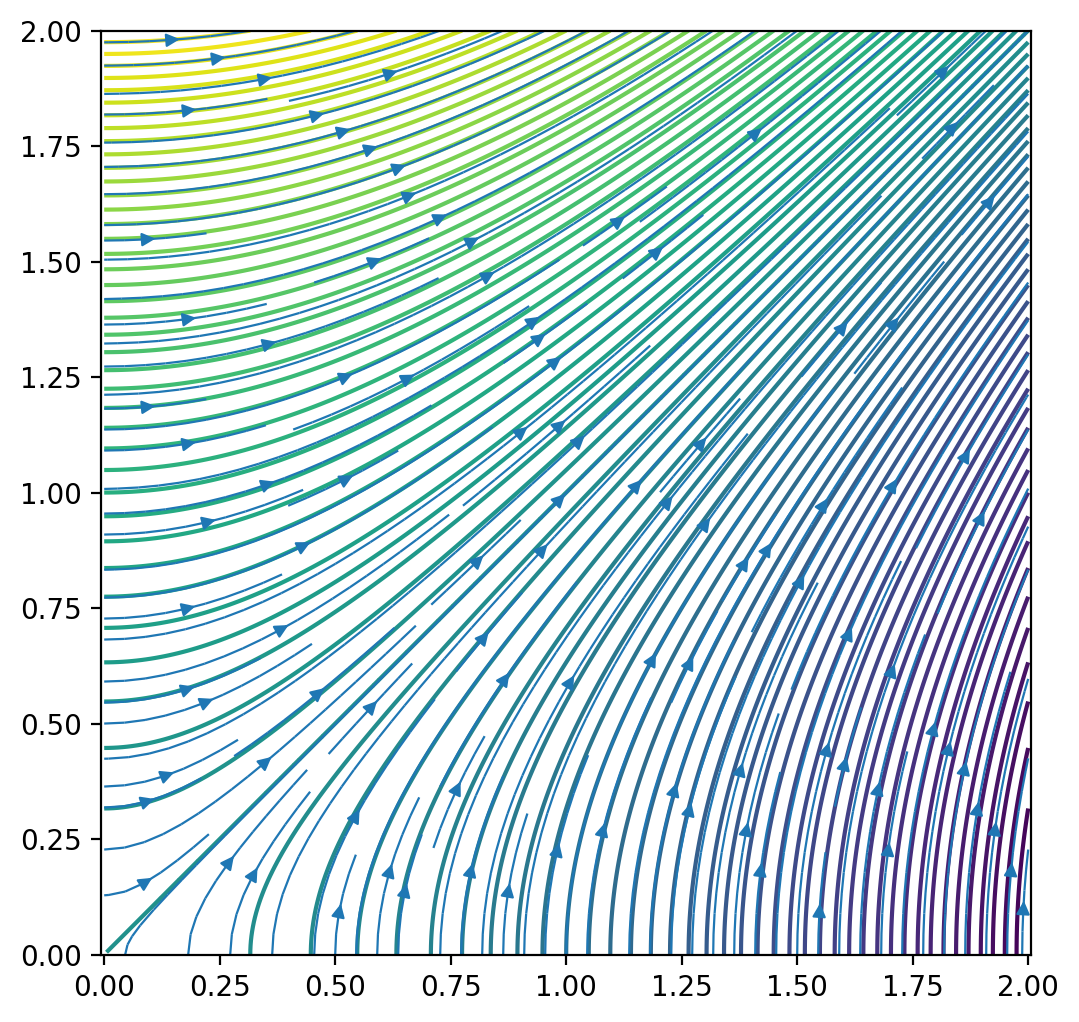

In [48]:
# you can define with polar coordinates like this
def my_flow(x,y):
    r = np.sqrt(x**2+y**2)
    theta = np.arctan(y/x)
    return -4*r**2*np.cos(2*theta)

plot_flow([my_flow])

C:\Users\EFO\AppData\Local\Temp\ipykernel_15760\857092539.py:9: RuntimeWarning: divide by zero encountered in divide
  my_flow = lambda x, y : 2*A*x*y+2*L**2*A*np.arctan(y/x)
C:\Users\EFO\AppData\Local\Temp\ipykernel_15760\857092539.py:9: RuntimeWarning: invalid value encountered in divide
  my_flow = lambda x, y : 2*A*x*y+2*L**2*A*np.arctan(y/x)


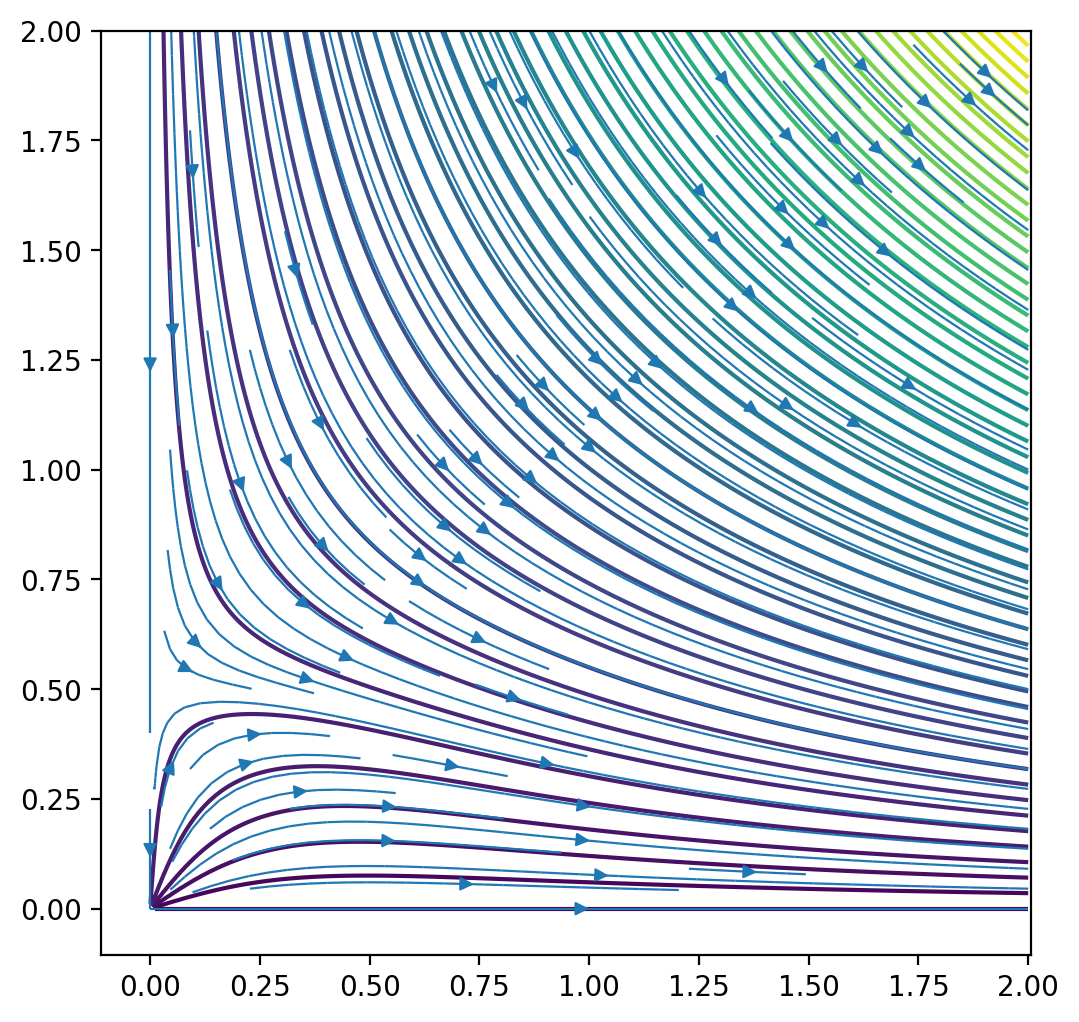

In [49]:
# This is a question from my fluid class
# It is like sea water from top with complex velocity potential PHI(z) = A*z^2
# and a fresh water from the corner as a source

# TODO: show the streamline that passes through P(0, L), which is the seperation between sea and fresh water

A = 1
L = 0.5
my_flow = lambda x, y : 2*A*x*y+2*L**2*A*np.arctan(y/x)

plot_flow([my_flow])

In [50]:
# TODO: How would you make an uniform flow that starts from y_boundary and above

C:\Users\EFO\AppData\Local\Temp\ipykernel_15760\480835795.py:54: RuntimeWarning: divide by zero encountered in divide
  return lambda x, y: m/(2*PI) * np.arctan((y-y0)/(x-x0))
C:\Users\EFO\AppData\Local\Temp\ipykernel_15760\480835795.py:54: RuntimeWarning: invalid value encountered in divide
  return lambda x, y: m/(2*PI) * np.arctan((y-y0)/(x-x0))
C:\Users\EFO\AppData\Local\Temp\ipykernel_15760\480835795.py:57: RuntimeWarning: divide by zero encountered in log
  return lambda x, y: -circulation/(2*PI)*np.log(np.sqrt(x**2+y**2))


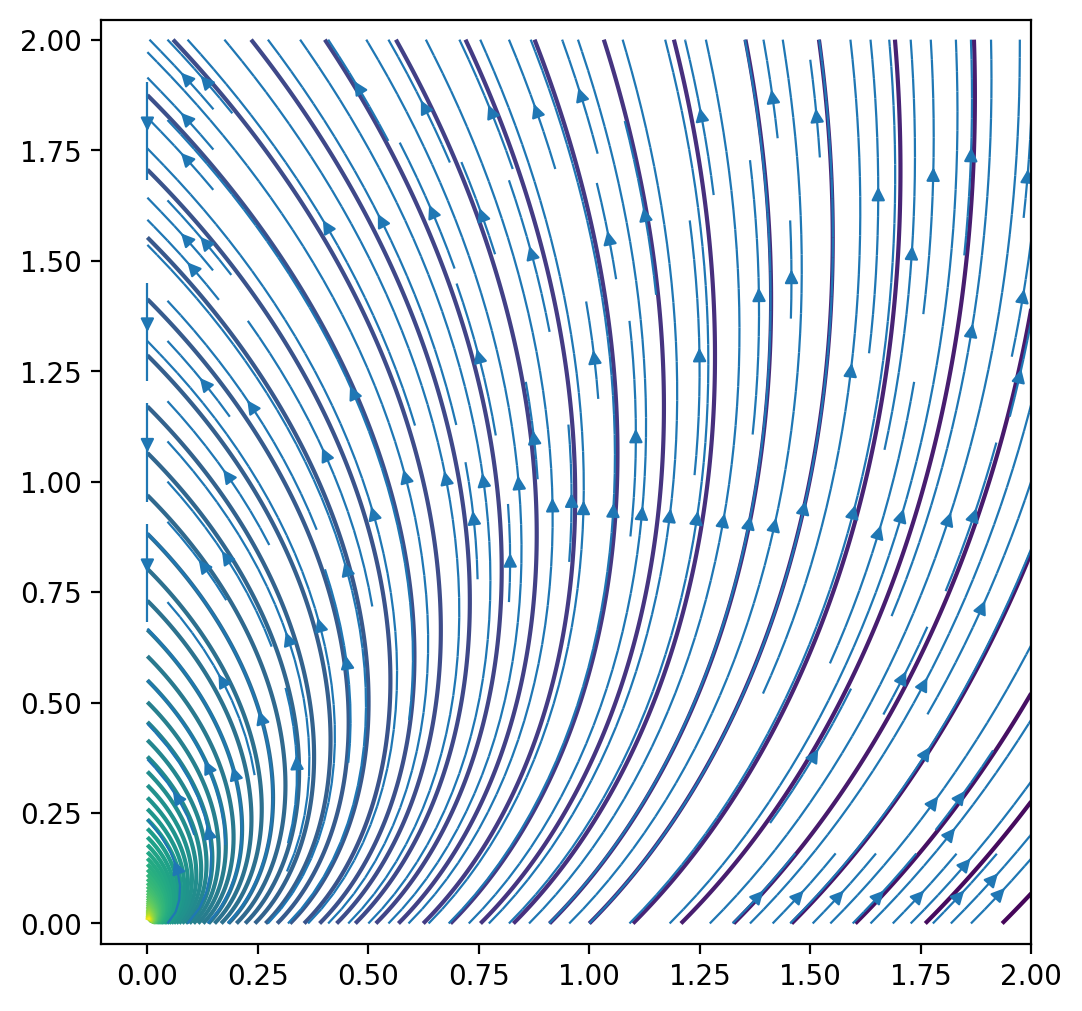

In [51]:
flows_maker = ElementaryFlows()

# psi1 = flows_maker.uniform(10, 0)
psi2 = flows_maker.source(0,0,10)
# psi3 = flows_maker.source(1,0,-10)
# psi4 = flows_maker.source(0,0.5,10)
# psi5 = flows_maker.source(0,-0.5,10)
# psi6 = flows_maker.doublet(10)
psi7 = flows_maker.vortex(10)
# plot_flow([psi1, psi2, psi3, psi4, psi5, psi6])
plot_flow([psi2,psi7])
